In [2]:
import pandas as pd
import numpy as np
import utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
%matplotlib inline

ImportError: No module named 'utils'

In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='zhr1201', api_key='sAQW84fUYdhX2n69HiQt')
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')
plotly.offline.init_notebook_mode(connected=True)
mapbox_access_token = 'pk.eyJ1IjoiemhyMTIwMSIsImEiOiJjam1hNGVpcjIwZTJpM3BxZDFuOWNraGphIn0.Wo8DgdjoXYLPzeSaPc1a-g'
sns.set_style("whitegrid")

ImportError: No module named 'plotly'

In [4]:
sns.__version__

NameError: name 'sns' is not defined

In [5]:
items = pd.read_csv('items.csv')
items_cat = pd.read_csv('item_categories.csv')
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')

OSError: File b'items.csv' does not exist

## Basic EDA

Merge duplicated shops names

In [5]:
shops.head(60)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [1]:
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11
shops.drop([0, 1, 10], inplace=True)


NameError: name 'train' is not defined

In [7]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops['city'].drop_duplicates()

2               Адыгея
3             Балашиха
4             Волжский
5              Вологда
6              Воронеж
9             Выездная
11           Жуковский
12    Интернет-магазин
13              Казань
15              Калуга
16             Коломна
17          Красноярск
19               Курск
20              Москва
33              Мытищи
34          Н.Новгород
36         Новосибирск
38                Омск
39        РостовНаДону
42                 СПб
44              Самара
46             Сергиев
47              Сургут
48               Томск
49              Тюмень
52                 Уфа
54               Химки
55            Цифровой
56               Чехов
57              Якутск
59           Ярославль
Name: city, dtype: object

Opps, Выездная is seems to be a place in the city of Vyezdnoye, not sure (need to check).
Интернет-магазин means online store so no positions for these cities.Цифровой склад 1С-Онлайн is also an online store

In [8]:
shops.loc[shops['city'] == 'Интернет-магазин', 'city'] = 'Интернет'
shops.loc[shops['city'] == 'Цифровой', 'city'] = 'Интернет'

In [9]:
train = train.merge(shops, how='left', on='shop_id')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва


In [10]:
mean_shop = train[['shop_id', 'item_cnt_day']].groupby('shop_id', as_index=False).mean()
mean_shop.columns = ['shop_id', 'mean_item_cnt_day']


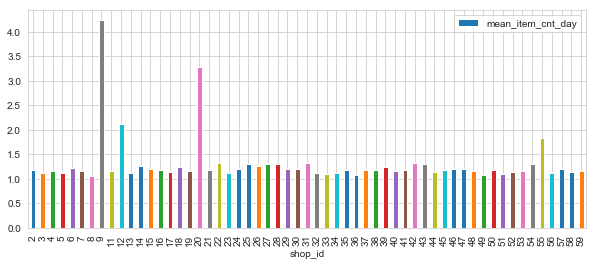

In [11]:
mean_shop.plot.bar(x='shop_id', y='mean_item_cnt_day', figsize=[10, 4])

Abnormal high value for 9 which is in Выездная, need to make sure what is this place

In [12]:
shops.loc[shops['city'] == 'Выездная', 'latitude'] = 55.3784
shops.loc[shops['city'] == 'Выездная', 'city'] = 43.7855

shops.loc[shops['city'] == 'Адыгея', 'latitude'] = 44.8229
shops.loc[shops['city'] == 'Адыгея', 'longitude'] = 40.1754
shops.loc[shops['city'] == 'Балашиха', 'latitude'] = 55.7982
shops.loc[shops['city'] == 'Балашиха', 'longitude'] = 37.9680
shops.loc[shops['city'] == 'Волжский', 'latitude'] = 48.8176
shops.loc[shops['city'] == 'Волжский', 'longitude'] = 44.770
shops.loc[shops['city'] == 'Вологда', 'latitude'] = 59.2181
shops.loc[shops['city'] == 'Вологда', 'longitude'] = 39.8978
shops.loc[shops['city'] == 'Воронеж', 'latitude'] = 51.6755
shops.loc[shops['city'] == 'Воронеж', 'longitude'] = 39.2089
shops.loc[shops['city'] == 'Жуковский', 'latitude'] = 55.5975
shops.loc[shops['city'] == 'Жуковский', 'longitude'] = 38.1133
shops.loc[shops['city'] == 'Казань', 'latitude'] = 55.8304
shops.loc[shops['city'] == 'Казань', 'longitude'] = 49.0661
shops.loc[shops['city'] == 'Калуга', 'latitude'] = 54.5519
shops.loc[shops['city'] == 'Калуга', 'longitude'] = 36.2851
shops.loc[shops['city'] == 'Коломна', 'latitude'] = 55.0938
shops.loc[shops['city'] == 'Коломна', 'longitude'] = 38.7689
shops.loc[shops['city'] == 'Красноярск', 'latitude'] = 56.0153
shops.loc[shops['city'] == 'Красноярск', 'longitude'] = 92.8932
shops.loc[shops['city'] == 'Курск', 'latitude'] = 51.7092
shops.loc[shops['city'] == 'Курск', 'longitude'] = 36.1562
shops.loc[shops['city'] == 'Москва', 'latitude'] = 55.7558
shops.loc[shops['city'] == 'Москва', 'longitude'] = 37.6173
shops.loc[shops['city'] == 'Мытищи', 'latitude'] = 55.9198
shops.loc[shops['city'] == 'Мытищи', 'longitude'] = 37.7655
shops.loc[shops['city'] == 'Н.Новгород', 'latitude'] = 56.2965
shops.loc[shops['city'] == 'Н.Новгород', 'longitude'] = 43.9361
shops.loc[shops['city'] == 'Новосибирск', 'latitude'] = 55.0084
shops.loc[shops['city'] == 'Новосибирск', 'longitude'] = 82.9357
shops.loc[shops['city'] == 'Омск', 'latitude'] = 54.9885
shops.loc[shops['city'] == 'Омск', 'longitude'] = 73.3242
shops.loc[shops['city'] == 'РостовНаДону', 'latitude'] = 47.2357
shops.loc[shops['city'] == 'РостовНаДону', 'longitude'] = 39.7015
shops.loc[shops['city'] == 'СПб', 'latitude'] = 59.9343
shops.loc[shops['city'] == 'СПб', 'longitude'] = 30.3351
shops.loc[shops['city'] == 'Самара', 'latitude'] = 53.2415
shops.loc[shops['city'] == 'Самара', 'longitude'] = 50.2212
shops.loc[shops['city'] == 'Сергиев', 'latitude'] = 56.3242
shops.loc[shops['city'] == 'Сергиев', 'longitude'] = 38.1452
shops.loc[shops['city'] == 'Сургут', 'latitude'] = 61.2560
shops.loc[shops['city'] == 'Сургут', 'longitude'] = 73.3845
shops.loc[shops['city'] == 'Томск', 'latitude'] = 56.5010
shops.loc[shops['city'] == 'Томск', 'longitude'] = 84.9925
shops.loc[shops['city'] == 'Тюмень', 'latitude'] = 57.1613
shops.loc[shops['city'] == 'Тюмень', 'longitude'] = 65.5250
shops.loc[shops['city'] == 'Уфа', 'latitude'] = 54.7388
shops.loc[shops['city'] == 'Уфа', 'longitude'] = 55.9721
shops.loc[shops['city'] == 'Химки', 'latitude'] = 55.8941
shops.loc[shops['city'] == 'Химки', 'longitude'] = 37.4439
shops.loc[shops['city'] == 'Чехов', 'latitude'] = 55.1526
shops.loc[shops['city'] == 'Чехов', 'longitude'] = 37.4605
shops.loc[shops['city'] == 'Якутск', 'latitude'] = 62.0355
shops.loc[shops['city'] == 'Якутск', 'longitude'] = 129.6755
shops.loc[shops['city'] == 'Ярославль', 'latitude'] = 57.6261
shops.loc[shops['city'] == 'Ярославль', 'longitude'] = 57.6261

In [13]:
site_lat = shops.loc[shops['latitude'].notnull(), 'latitude']
site_lon = shops.loc[shops['latitude'].notnull(), 'longitude']
locations_name = shops.loc[shops['latitude'].notnull(), 'city']
data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    )]


layout = go.Layout(
    title='shop locations',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=site_lat.mean(),
            lon=site_lon.mean()
        ),
        pitch=0,
        zoom=2,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='shop locations')



In [14]:
shops = shops.merge(mean_shop, how='left')
shops.head()


,shop_name,shop_id,city,latitude,longitude,mean_item_cnt_day
0,"Адыгея ТЦ ""Мега""",2,Адыгея,44.8229,40.1754,1.178100
1,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,55.7982,37.9680,1.110567
2,"Волжский ТЦ ""Волга Молл""",4,Волжский,48.8176,44.7700,1.149051
3,"Вологда ТРЦ ""Мармелад""",5,Вологда,59.2181,39.8978,1.120040
4,"Воронеж (Плехановская, 13)",6,Воронеж,51.6755,39.2089,1.215647


In [15]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
utils.simple_eda(items)
items.describe()

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
-----------Data Types-----------
item_name           object
item_id              int64
item_category_id     int64
dtype: object
----------Missing value-----------
item_name           0
item_id             0
item_category_id    0
dtype: int64
----------Null value-----------
item_name           0
item_id             0
item_category_id    0
dtype: int64
----------Shape of Data----------
(22170, 3)


,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


Text(0,0.5,'number of items in the category')

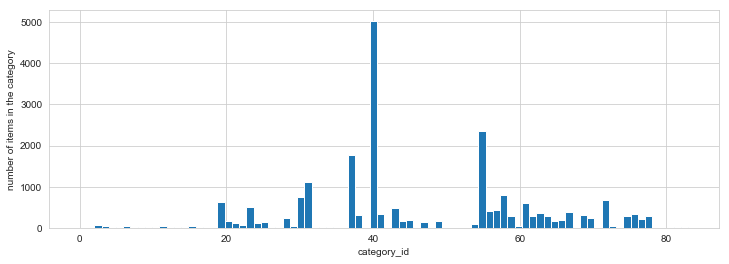

In [17]:
items['item_category_id'].hist(figsize=[12, 4], bins=83 + 1)
plt.xlabel('category_id')
plt.ylabel('number of items in the category')


In [18]:
items_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [19]:
print('category that contains the most number of items: %s' % items_cat.iloc[40, 0])

category that contains the most number of items: Кино - DVD


In [20]:
utils.simple_eda(items_cat)

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
-----------Data Types-----------
item_category_name    object
item_category_id       int64
dtype: object
----------Missing value-----------
item_category_name    0
item_category_id      0
dtype: int64
----------Null value-----------
item_category_name    0
item_category_id      0
dtype: int64
----------Shape of Data----------
(84, 2)


In [21]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва


In [22]:
subset = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']
print(train.shape)
train.drop_duplicates(subset=subset, inplace=True)
print(train.shape)

(2935849, 8)
(2935843, 8)


In [23]:
# train_ext is used to store all the generated features or imputing 
time_stamp = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['date'] = time_stamp
train.loc[:, 'year'] = time_stamp.dt.year
train.loc[:, 'month'] = time_stamp.dt.month
train.loc[:, 'day'] = time_stamp.dt.day
train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,15


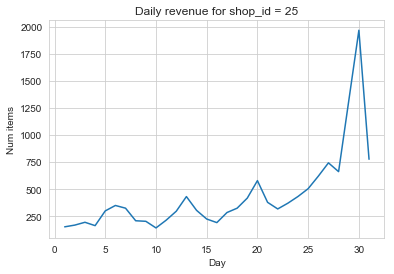

In [24]:
train.loc[:, 'add_rev'] = train['item_price'] * train['item_cnt_day']
trans_sel = train[(train['shop_id'] == 25)
                         & (train['year'] == 2014) & (train['month'] == 12)].sort_values('day')
trans_res = trans_sel.groupby('day')['item_cnt_day'].sum().reset_index(name ='total_count')

total_num_items_sold = trans_res['total_count']
days = trans_res['day']

plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

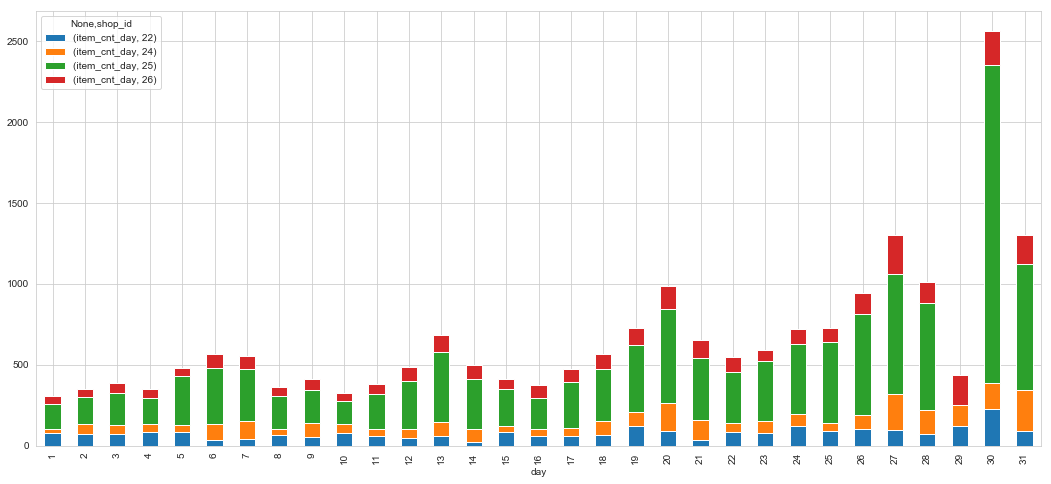

In [25]:
trans_sel = train[(train['shop_id'].isin([22, 23, 24, 25, 26]))
                         & (train['year'] == 2014) & (train['month'] == 12)].sort_values('day')
trans_res = trans_sel[['shop_id', 'day', 'item_cnt_day']].groupby(['day', 'shop_id']).sum()
trans_res.unstack().plot(kind='bar', stacked=True, figsize=(18, 8))

In [26]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,2013,1,2,999.00
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,3,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,2013,1,5,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,6,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,15,1099.00


Interesting parttern regarding the day in a week. Bar plot of multiple shops should be considered

In [27]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,add_rev
count,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06
mean,1.456991e+01,3.331062e+01,1.019723e+04,8.908535e+02,1.242641e+00,2.013777e+03,6.247719e+00,1.585267e+01,1.157733e+03
std,9.422992e+00,1.613680e+01,6.324293e+03,1.729801e+03,2.618837e+00,7.684796e-01,3.536219e+00,8.923479e+00,5.683609e+03
min,0.000000e+00,2.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,2.013000e+03,1.000000e+00,1.000000e+00,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,4.490000e+02
75%,2.300000e+01,4.800000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.014000e+03,9.000000e+00,2.400000e+01,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,2.015000e+03,1.200000e+01,3.100000e+01,1.829990e+06


Item price below 0, need to be dropped.

,date,date_block_num
2935844,2015-10-10,33
2935845,2015-10-09,33
2935846,2015-10-14,33
2935847,2015-10-22,33
2935848,2015-10-03,33


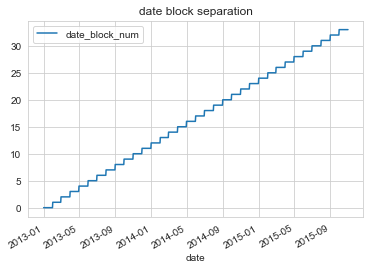

In [28]:
date_block_map = train[['date', 'date_block_num']]
date_block_map.plot(x='date', y='date_block_num')
plt.title('date block separation')
date_block_map.tail()

In [29]:
utils.simple_eda(train)

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 12 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
shop_name         object
city              object
year              int64
month             int64
day               int64
add_rev           float64
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 291.2+ MB
None
-----------Data Types-----------
date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
shop_name                 object
city                      object
year                       int64
month                      int64
day                        int64
add_rev                  float64
dtype: object
----------Missing

            item_id         count
count  21807.000000  21807.000000
mean   11098.699271    134.628468
std     6397.059362    406.937433
min        0.000000      1.000000
25%     5551.500000      6.000000
50%    11105.000000     32.000000
75%    16647.500000    119.000000
max    22169.000000  31340.000000


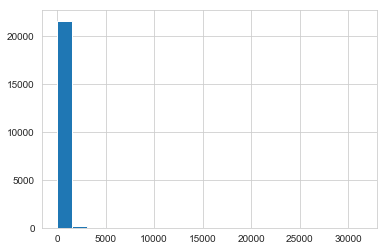

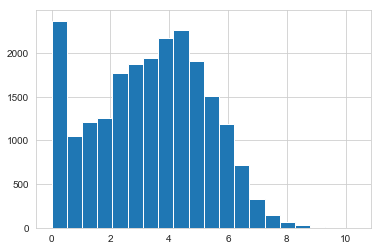

In [30]:
item_id_count = train[['item_id', 'shop_id']].groupby('item_id', as_index=False).count()
item_id_count.columns=['item_id', 'count']
print(item_id_count.describe())
item_id_count['count'].hist(bins=20)
plt.figure()
item_id_count['count'].map(np.log).hist(bins=20)

The log plot shows abnormal distribution arount the first bin. Probabaly due to imputing.

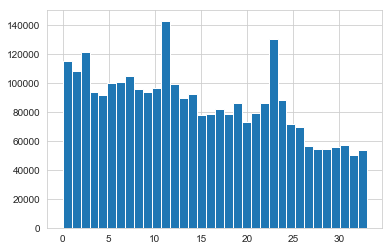

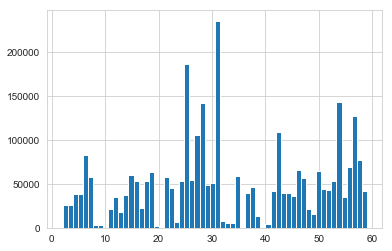

In [31]:
train['date_block_num'].hist(bins=34)
plt.figure()
train['shop_id'].hist(bins=train['shop_id'].max() + 1)

There seems to be some high value in certrain month, may be due to holidays or something.

/Users/zhouhaoran/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/pandas/core/base.py:1004: RuntimeWarning:

invalid value encountered in log



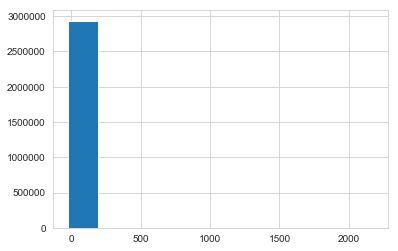

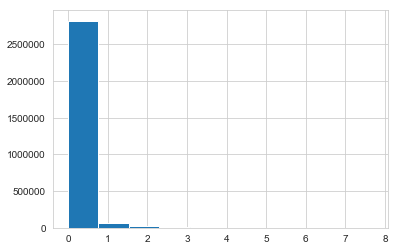

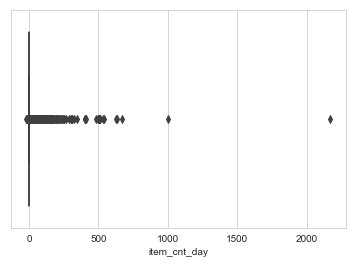

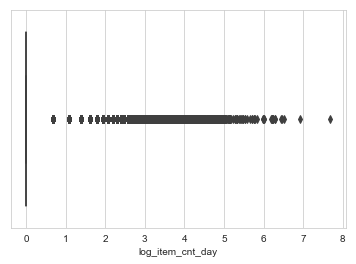

In [32]:
train['item_cnt_day'].hist()
train['log_item_cnt_day'] = train['item_cnt_day'].map(np.log)
plt.figure()
train['log_item_cnt_day'].hist()
count = pd.cut(train['item_cnt_day'], 10).value_counts().sort_index()
plt.figure()
sns.boxplot(x=train['item_cnt_day'])
count.head(10)
plt.figure()
sns.boxplot(x=train['log_item_cnt_day'])


Probably a good feature

/Users/zhouhaoran/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/pandas/core/base.py:1004: RuntimeWarning:

invalid value encountered in log



(-308.981, 30797.1]     2935626
(30797.1, 61595.2]          216
(61595.2, 92393.3]            0
(92393.3, 123191.4]           0
(123191.4, 153989.5]          0
(153989.5, 184787.6]          0
(184787.6, 215585.7]          0
(215585.7, 246383.8]          0
(246383.8, 277181.9]          0
(277181.9, 307980.0]          1
Name: item_price, dtype: int64

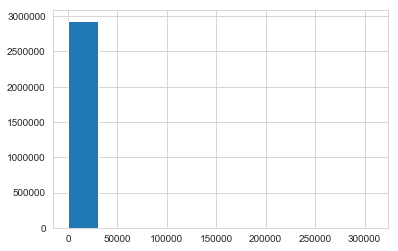

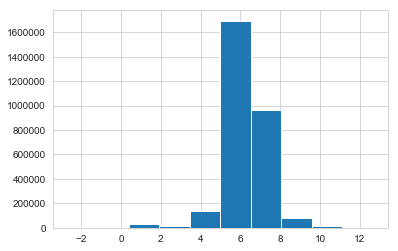

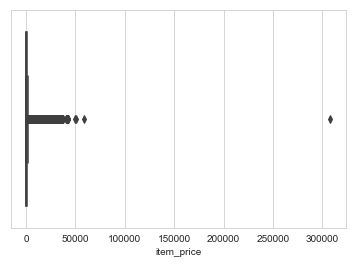

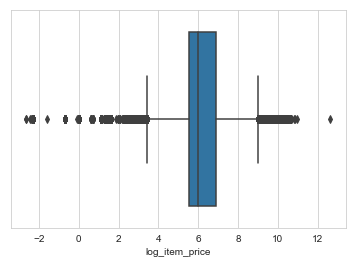

In [33]:
train['item_price'].hist()
train['log_item_price'] = train['item_price'].map(np.log)
plt.figure()
train['log_item_price'].hist()
count = pd.cut(train['item_price'], 10).value_counts().sort_index()
plt.figure()
sns.boxplot(train['item_price'])
plt.figure()
sns.boxplot(train['log_item_price'])
count.head(10)


There seems to be a outlier which may be caused by miss typing or somethng.

In [34]:
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev,log_item_cnt_day,log_item_price
484683,2013-05-15,4,32,2973,-1.0,1.0,"Москва ТЦ ""Серебряный Дом""",Москва,2013,5,15,-1.0,0.0,NaN


In [35]:
train.loc[train['item_id'] == 2973, ['month', 'shop_id', 'item_price']].groupby(['month', 'shop_id']).describe().head(10)

item_price                                                     \
                   count         mean         std          min          25%   
month shop_id                                                                 
1     2              1.0  2499.000000         NaN  2499.000000  2499.000000   
      3              4.0  2499.000000    0.000000  2499.000000  2499.000000   
      4              4.0  2498.937500    0.125000  2498.750000  2498.937500   
      6             11.0  2498.931818    0.161667  2498.500000  2499.000000   
      7              3.0  2498.972222    0.048113  2498.916667  2498.958333   
      8              5.0  2499.000000    0.000000  2499.000000  2499.000000   
      11             3.0  1901.000000    0.000000  1901.000000  1901.000000   
      12             3.0  2499.000000    0.000000  2499.000000  2499.000000   
      14             6.0  2499.000000    0.000000  2499.000000  2499.000000   
      15             8.0  2436.500000  176.776695  1999.000000  2499.000000   

                                       
                  50%     75%     max  
month shop_id                          
1     2        2499.0  2499.0  2499.0  
      3        2499.0  2499.0  2499.0  
      4        2499.0  2499.0  2499.0  
      6        2499.0  2499.0  2499.0  
      7        2499.0  2499.0  2499.0  
      8        2499.0  2499.0  2499.0  
      11       1901.0  1901.0  1901.0  
      12       2499.0  2499.0  2499.0  
      14       2499.0  2499.0  2499.0  
      15       2499.0  2499.0  2499.0

Not much deviation for the price for the same item in the same shop and in the same month, so impute the abnormal values using the mean value in the specific group.

In [36]:
mean_price = train.loc[(train['item_id'] == 2973) & (train['year'] == 2013) , ['month', 'shop_id', 'item_price']].groupby(['month', 'shop_id']).mean()
df_for_impute = mean_price.loc[(mean_price.index.get_level_values('month') == 5) & (mean_price.index.get_level_values('shop_id') == 32)]
train.loc[train['item_price'] < 0, 'item_price'] = df_for_impute.iloc[0, 0]


In [37]:
train[train['item_price'] > 300000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev,log_item_cnt_day,log_item_price
1163158,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Интернет,2013,12,13,307980.0,0.0,12.63779


In [38]:
train[train['item_id'] == 6066].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev,log_item_cnt_day,log_item_price
1163158,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Интернет,2013,12,13,307980.0,0.0,12.63779


In [39]:
test[test['item_id'] == 6066].head()

,ID,shop_id,item_id


There is only one id equals to 6066, which is the outliers item_id, in training set and no such samples in the test set, so simply drop the outlier.

In [40]:

# drop price below zero and the outlier
train.drop(train[train['item_price'] > 300000].index, inplace=True)
train.shape

(2935842, 14)

In [41]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [42]:
utils.simple_eda(test)

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
-----------Data Types-----------
ID         int64
shop_id    int64
item_id    int64
dtype: object
----------Missing value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------Null value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------Shape of Data----------
(214200, 3)


In [43]:
shops.head()

,shop_name,shop_id,city,latitude,longitude,mean_item_cnt_day
0,"Адыгея ТЦ ""Мега""",2,Адыгея,44.8229,40.1754,1.178100
1,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,55.7982,37.9680,1.110567
2,"Волжский ТЦ ""Волга Молл""",4,Волжский,48.8176,44.7700,1.149051
3,"Вологда ТРЦ ""Мармелад""",5,Вологда,59.2181,39.8978,1.120040
4,"Воронеж (Плехановская, 13)",6,Воронеж,51.6755,39.2089,1.215647


In [44]:
utils.simple_eda(shops)  

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 6 columns):
shop_name            57 non-null object
shop_id              57 non-null int64
city                 57 non-null object
latitude             55 non-null float64
longitude            54 non-null float64
mean_item_cnt_day    57 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ KB
None
-----------Data Types-----------
shop_name             object
shop_id                int64
city                  object
latitude             float64
longitude            float64
mean_item_cnt_day    float64
dtype: object
----------Missing value-----------
shop_name            0
shop_id              0
city                 0
latitude             2
longitude            3
mean_item_cnt_day    0
dtype: int64
----------Null value-----------
shop_name            0
shop_id              0
city                 0
latitude             2
longitude            3
m

In [45]:
submission.head()
train = pd.merge(train, items, how='left', on='item_id')
train_month = train
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev,log_item_cnt_day,log_item_price,item_name,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,2013,1,2,999.00,0.0,6.906755,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,3,899.00,0.0,6.801283,DEEP PURPLE The House Of Blue Light LP,58
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,2013,1,5,-899.00,NaN,6.801283,DEEP PURPLE The House Of Blue Light LP,58
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,6,1709.05,0.0,7.443693,DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,15,1099.00,0.0,7.002156,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [46]:
train_month = train_month.drop(['date','item_price', 'add_rev'], axis=1)
train_month = train_month.groupby([c for c in train_month.columns if c not in ['item_cnt_day']], as_index=False)[['item_cnt_day']].sum()
train_month = train_month.rename(columns={'item_cnt_day':'item_cnt_month'})
train_month.head()

,date_block_num,shop_id,item_id,shop_name,city,year,month,day,log_item_cnt_day,log_item_price,item_name,item_category_id,item_cnt_month
0,0,2,27,"Адыгея ТЦ ""Мега""",Адыгея,2013,1,11,0.0,7.823646,"007 Legends [PS3, русская версия]",19,1.0
1,0,2,33,"Адыгея ТЦ ""Мега""",Адыгея,2013,1,5,0.0,6.212606,1+1 (BD),37,1.0
2,0,2,317,"Адыгея ТЦ ""Мега""",Адыгея,2013,1,4,0.0,5.700444,1С:Аудиокниги. Мединский В. Мифы о России. О р...,45,1.0
3,0,2,438,"Адыгея ТЦ ""Мега""",Адыгея,2013,1,19,0.0,5.700444,1С:Аудиотеатр. Лучшие произведения русских пис...,45,1.0
4,0,2,471,"Адыгея ТЦ ""Мега""",Адыгея,2013,1,9,0.0,5.988961,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,49,1.0


In [47]:
shop_item_monthly_mean = train_month[['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)[['item_cnt_month']].mean()
shop_item_monthly_mean = shop_item_monthly_mean.rename(columns={'item_cnt_month':'item_cnt_month_mean'})

In [48]:
stores_hm = train_month.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0)


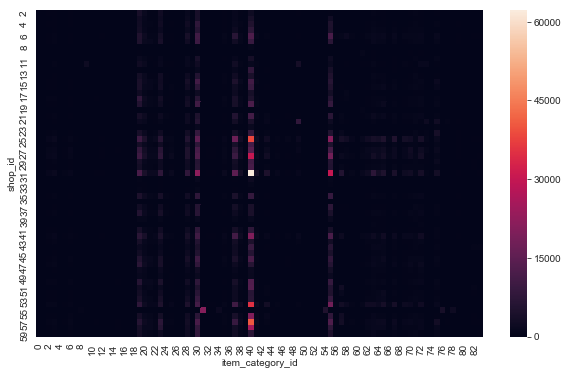

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(stores_hm, ax=ax, cbar=True)

Certain shops sells certain categories of items much more than others, mean encoding can help.

In [50]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'shop_name', 'city', 'year', 'month', 'day', 'add_rev',
       'log_item_cnt_day', 'log_item_price', 'item_name', 'item_category_id'],
      dtype='object')

In [51]:
item_cnt_month = train[['date_block_num', 'shop_id', 'item_id', 'item_cnt_day']].groupby(
    ['date_block_num', 'shop_id', 'item_id'], as_index=False).sum()
item_cnt_month.rename(index=str, columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

In [52]:
train = train.merge(item_cnt_month, on=['date_block_num', 'shop_id', 'item_id'])

In [53]:
sel_cols = [c for c in train.columns if train.dtypes[c] == 'int64' or train.dtypes[c] == 'float64']


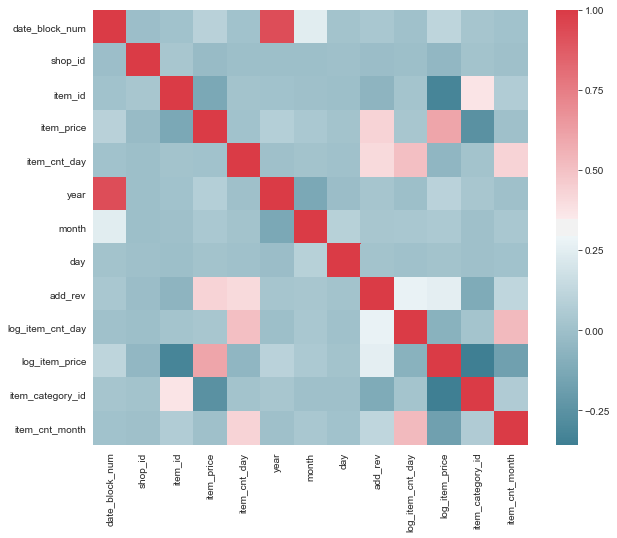

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
corr = (train[sel_cols] - train[sel_cols].mean()).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Nothing useful except some value pairs that are expect to be highly correlated.

Since the target value is item_cnt_month, so drop unrelated raws and columns and generate month related values

In [55]:
train_mean_price = train[['date_block_num', 'item_id', 'shop_id', 'item_price']]
train_mean_price = train_mean_price.groupby(['item_id', 'shop_id', 'date_block_num'], as_index=False).mean()


In [56]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev,log_item_cnt_day,log_item_price,item_name,item_category_id,item_cnt_month
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,2013,1,2,999.00,0.0,6.906755,ЯВЛЕНИЕ 2012 (BD),37,1.0
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,3,899.00,0.0,6.801283,DEEP PURPLE The House Of Blue Light LP,58,0.0
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,2013,1,5,-899.00,NaN,6.801283,DEEP PURPLE The House Of Blue Light LP,58,0.0
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,6,1709.05,0.0,7.443693,DEEP PURPLE Who Do You Think We Are LP,58,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,15,1099.00,0.0,7.002156,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,1.0


Boxplot of several items of different shops in differen month

(4.8, 5.05)

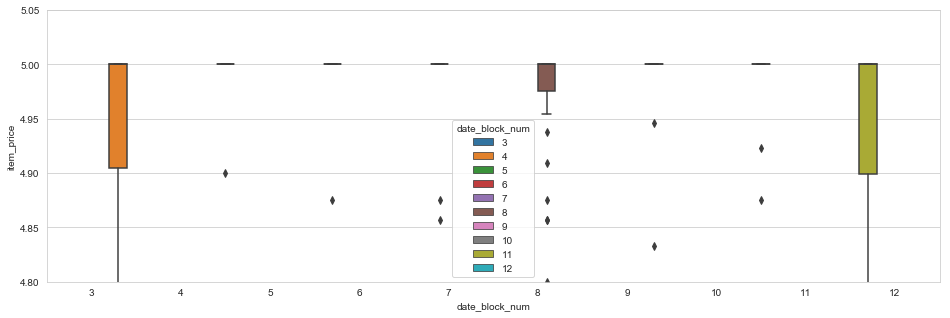

In [57]:
sel_data = train.loc[(train['date_block_num'] >= 0) & (train['date_block_num'] <= 12) &
                     (train['item_id'] == 20949) & (train['shop_id'] == 22),
                     ['date_block_num', 'item_price']]
plt.figure(figsize=[16, 5])
ax = sns.boxplot(x='date_block_num', y='item_price', hue='date_block_num', data=sel_data, width=2)
mpl.axes.Axes.set_ylim(ax, [4.8, 5.05])

In [58]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,year,month,day,add_rev,log_item_cnt_day,log_item_price,item_name,item_category_id,item_cnt_month
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,2013,1,2,999.00,0.0,6.906755,ЯВЛЕНИЕ 2012 (BD),37,1.0
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,3,899.00,0.0,6.801283,DEEP PURPLE The House Of Blue Light LP,58,0.0
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,2013,1,5,-899.00,NaN,6.801283,DEEP PURPLE The House Of Blue Light LP,58,0.0
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,6,1709.05,0.0,7.443693,DEEP PURPLE Who Do You Think We Are LP,58,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,2013,1,15,1099.00,0.0,7.002156,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,1.0


So item price won't change much in a month. Average price can be a good feature for montly sell. For this item, prices in the same month are mostly clustered at the high price range, sometimes low price is because of sales promotion. So adding some quantile information may help capture this. Since the price is not provided in the test set, we probably can use scaled price divergence information for the same month in last year. If time permitted, this feature should be tested

Drop item name and then using item_id to add TFIDF features

In [59]:
train.drop(['date', 'item_price', 'item_cnt_day',
            'day', 'shop_name', 'add_rev', 'log_item_cnt_day', 'log_item_price', 'item_name'], axis=1, inplace=True)
train.drop_duplicates(inplace=True)
train.head()

,date_block_num,shop_id,item_id,city,year,month,item_category_id,item_cnt_month
0,0,59,22154,Ярославль,2013,1,37,1.0
1,0,25,2552,Москва,2013,1,58,0.0
3,0,25,2554,Москва,2013,1,58,1.0
4,0,25,2555,Москва,2013,1,56,1.0
5,0,25,2564,Москва,2013,1,59,1.0


In [60]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [61]:
#Generate mean_item_cnt_day after train validation split
shops.drop(['mean_item_cnt_day'], axis=1, inplace=True)   
shops.head()

,shop_name,shop_id,city,latitude,longitude
0,"Адыгея ТЦ ""Мега""",2,Адыгея,44.8229,40.1754
1,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,55.7982,37.9680
2,"Волжский ТЦ ""Волга Молл""",4,Волжский,48.8176,44.7700
3,"Вологда ТРЦ ""Мармелад""",5,Вологда,59.2181,39.8978
4,"Воронеж (Плехановская, 13)",6,Воронеж,51.6755,39.2089


Dealing with text features using Bag of Words

In [62]:
feature_cnt = 25
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
items['item_name_len'] = items['item_name'].map(len) #Lenth of Item Description
items['item_name_wc'] = items['item_name'].map(lambda x: len(str(x).split(' '))) #Item Description Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(items['item_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    items['item_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
items.head()

,item_name,item_id,item_category_id,item_name_len,item_name_wc,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [63]:
train = train.merge(items, on=['item_id', 'item_category_id'])
train.drop(['item_name'], axis=1)


,date_block_num,shop_id,item_id,city,year,month,item_category_id,item_cnt_month,item_name_len,item_name_wc,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,0,59,22154,Ярославль,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,24,22154,Москва,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,27,22154,Москва,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,25,22154,Москва,2013,1,37,5.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,6,22154,Воронеж,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,15,22154,Калуга,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,7,22154,Воронеж,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,31,22154,Москва,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,54,22154,Химки,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,42,22154,СПб,2013,1,37,1.0,17,3,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
train = train.merge(shops, on=['shop_id', 'city'])
train.drop(['shop_name'], axis=1, inplace=True)
train.head()

,date_block_num,shop_id,item_id,city,year,month,item_category_id,item_cnt_month,item_name,item_name_len,...,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,latitude,longitude
0,0,59,22154,Ярославль,2013,1,37,1.0,ЯВЛЕНИЕ 2012 (BD),17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261
1,4,59,2573,Ярославль,2013,5,55,1.0,DEL REY LANA Born To Die,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261
2,0,59,2574,Ярославль,2013,1,55,2.0,DEL REY LANA Born To Die The Paradise Editio...,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261
3,1,59,2574,Ярославль,2013,2,55,1.0,DEL REY LANA Born To Die The Paradise Editio...,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261
4,2,59,2574,Ярославль,2013,3,55,1.0,DEL REY LANA Born To Die The Paradise Editio...,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261


## Try to figure out the sampling method of the test set

In [65]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


No dateblock, according to the competition it should be next month.

In [66]:
test['date_block_num'] = 34
test['year'] = 2015
test['month'] = 7
test = test.merge(shops, on='shop_id', how='left')


In [67]:
test = test.merge(items, on='item_id', how='left')
test.head()

,ID,shop_id,item_id,date_block_num,year,month,shop_name,city,latitude,longitude,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,0,5,5037,34,2015,7,"Вологда ТРЦ ""Мармелад""",Вологда,59.2181,39.8978,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,5,5320,34,2015,7,"Вологда ТРЦ ""Мармелад""",Вологда,59.2181,39.8978,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2,5,5233,34,2015,7,"Вологда ТРЦ ""Мармелад""",Вологда,59.2181,39.8978,...,0.000000,0.441193,0.0,0.0,0.0,0.0,0.578850,0.0,0.0,0.0
3,3,5,5232,34,2015,7,"Вологда ТРЦ ""Мармелад""",Вологда,59.2181,39.8978,...,0.554199,0.356989,0.0,0.0,0.0,0.0,0.468373,0.0,0.0,0.0
4,4,5,5268,34,2015,7,"Вологда ТРЦ ""Мармелад""",Вологда,59.2181,39.8978,...,0.000000,0.606187,0.0,0.0,0.0,0.0,0.795322,0.0,0.0,0.0


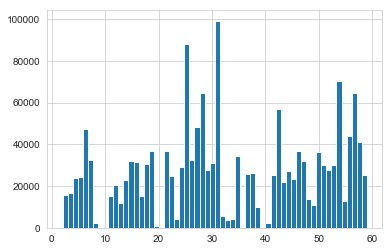

In [68]:
train['shop_id'].hist(bins=60)

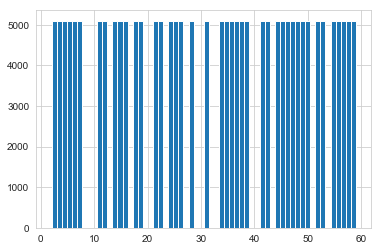

In [69]:
test['shop_id'].hist(bins=60)

Evenly sampled

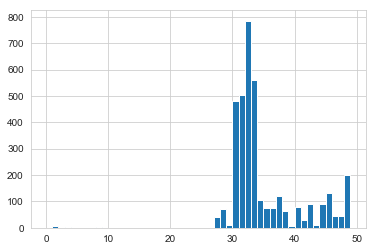

In [70]:
train.loc[train['item_id'] < 50, 'item_id'].hist(bins=range(50))


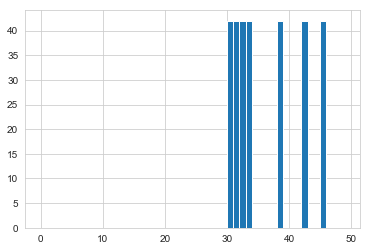

In [71]:
test.loc[test['item_id'] < 50, 'item_id'].hist(bins=range(50))

Also evenly sampled some items, some items in the training set are also in the test set

In [72]:
plot_range = 200
train_part = train.loc[(train['item_id'] < plot_range) & (train['shop_id'] < 63), ['item_id', 'shop_id'] ].drop_duplicates()
train_part['is_train'] = True
test_part = test.loc[(test['item_id'] < plot_range) & (test['shop_id'] < 63), ['item_id', 'shop_id'] ].drop_duplicates()
test_part['is_test'] = True
all_data = train_part.merge(test_part, how='outer', on=['item_id', 'shop_id'])
all_data.loc[all_data['is_train'] == True, 'label'] = 'train'
all_data.loc[all_data['is_test'] == True, 'label'] = 'test'
all_data.loc[(all_data['is_test'] == True)&(all_data['is_train'] == True), 'label'] = 'train and test'
all_data.drop(['is_train', 'is_test'], axis=1, inplace=True)
all_data.head()

,item_id,shop_id,label
0,98,59,train
1,32,59,train and test
2,33,59,train and test
3,34,59,train
4,75,59,train


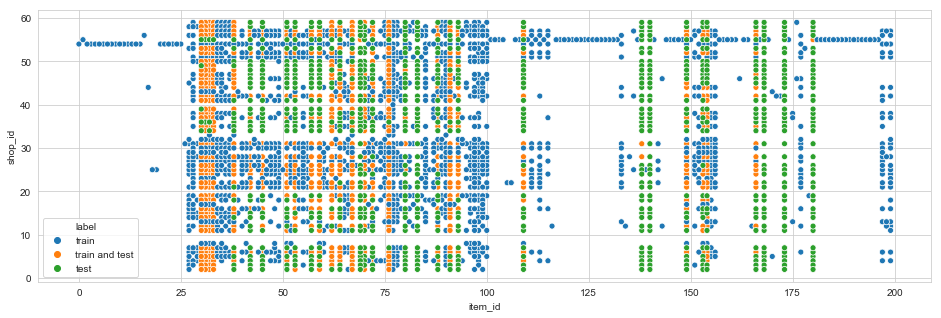

In [73]:
plt.figure(figsize=[16, 5])
sns.scatterplot(x='item_id', y='shop_id', hue="label", data=all_data)

So there are shop item pairs in only training set, test set and both training and test set.

In [74]:
train['shop_id'].unique().size

56

In [75]:
train['shop_id'].unique().max()

59

In [76]:
test['shop_id'].unique().size

42

In [77]:
pd.concat([train['shop_id'], test['shop_id']]).unique().size

56

all shops in the test set are also in the training set

In [78]:
train['item_id'].unique().size

21680

In [79]:
test['item_id'].unique().size

5100

In [80]:
pd.concat([train['item_id'], test['item_id']]).unique().size

22050

So some items are only in the training set, some are only in the test set. In order to mimic the fractions in the validation set, the fractions should be computed first.

In [81]:
train['item_category_id'].unique().size

84

In [82]:
test['item_category_id'].unique().size

62

In [83]:
pd.concat([train['item_category_id'], test['item_category_id']]).unique().size

84

All item_category_ids are in the training set

In [84]:
test_part = test[['shop_id', 'item_id']].drop_duplicates()
train_part = train[['shop_id', 'item_id']].drop_duplicates()
test_part['is_test'] = True
train_part['is_train'] = True
all_data = test_part.merge(train_part, on=['item_id', 'shop_id'], how='outer')
all_data.loc[all_data['is_train'] == True, 'label'] = 'train'
all_data.loc[all_data['is_test'] == True, 'label'] = 'test'
all_data.loc[(all_data['is_test'] == True)&(all_data['is_train'] == True), 'label'] = 'train and test'
all_data.drop(['is_train', 'is_test'], axis=1, inplace=True)


In [85]:
all_data['count'] = 1
label_count = all_data[['label', 'count']].groupby('label').sum()
label_count.head()
print('------------shop item pairs-------------')
print('only test proportion %.3f' % (float(label_count.loc['test']) / label_count['count'].sum()))
print('only train proportion %.3f' % (float(label_count.loc['train']) / label_count['count'].sum()))
print('both train and test proportion %.3f' % (float(label_count.loc['train and test']) / label_count['count'].sum()))

------------shop item pairs-------------
only test proportion 0.197
only train proportion 0.588
both train and test proportion 0.214


So the proportion of samples in the test set those are also in the training set almost equals to the number of samples those are not in the training set.

In [86]:
n_all_items = len(set(train['item_id']).union(set(test['item_id'])))
n_only_test = len(set(test['item_id']).difference(set(train['item_id'])))
n_only_train = len(set(train['item_id']).difference(set(test['item_id'])))
n_both_train_test = len(set(train['item_id']).intersection(set(test['item_id'])))
print('----------------items----------------')
print('only test proportion %.3f' % (float(n_only_test) / n_all_items))
print('only train proportion %.3f' % (float(n_only_train) / n_all_items))
print('both train and test proportion %.3f' % (float(n_both_train_test) / n_all_items))

----------------items----------------
only test proportion 0.017
only train proportion 0.769
both train and test proportion 0.215


In [87]:
train_count = train.groupby('date_block_num').size().reset_index(name='Counts')
train_count.tail()

,date_block_num,Counts
29,29,31909
30,30,33527
31,31,33486
32,32,29678
33,33,31141


If all the data in date block 33 is assigned to the validation set, the proportion will be like

In [88]:
float(train_count.iloc[33, 1]) / train_count['Counts'].sum()

0.019371931631843097

In [89]:
train_pairs = train.loc[train['date_block_num'] != 33, ['shop_id', 'item_id']].drop_duplicates()
train_pairs['is_train'] = True
validation_pairs = train.loc[train['date_block_num'] == 33, ['shop_id', 'item_id']].drop_duplicates()
validation_pairs['is_val'] = True
all_pairs = train_pairs.merge(validation_pairs, how='outer', on=['shop_id', 'item_id'])

In [90]:
all_pairs.head()

,shop_id,item_id,is_train,is_val
0,59,22154,True,NaN
1,59,2573,True,NaN
2,59,2574,True,NaN
3,59,2607,True,NaN
4,59,2546,True,NaN


In [91]:
N_val = all_pairs[(all_pairs['is_train'].isnull()) & (all_pairs['is_val'] == True)].shape[0]
N_train_val = all_pairs[(all_pairs['is_train'] == True) & (all_pairs['is_val'] == True)].shape[0]
N_train = all_pairs[(all_pairs['is_train'] == True) & (all_pairs['is_val'].isnull())].shape[0]
N_tot = all_pairs.shape[0]
print('---------------- shop items pairs for train test split ----------------')
print('only validation proportion %.3f' % (float(N_val) / N_tot))
print('only train proportion %.3f' % (float(N_train) / N_tot))
print('both train and validation proportion %.3f' % (float(N_train_val) / N_tot))

---------------- shop items pairs for train test split ----------------
only validation proportion 0.016
only train proportion 0.925
both train and validation proportion 0.058


For a better validation, some samples in the training set should be removed so that the validation proportion should roughly eqauls to the proportion of samples that are in both the training set and validation set.

In [92]:
to_remove = all_pairs[(all_pairs['is_train'] == True) & (all_pairs['is_val'] == True)].sample(
    frac=0.33, random_state=1)
train_pairs.shape

(410699, 3)

In [93]:
train_pairs = pd.merge(
    train_pairs[['shop_id', 'item_id']], to_remove[['shop_id', 'item_id']], indicator=True, how='outer').query(
    '_merge=="left_only"').drop('_merge', axis=1)
train_pairs['is_train'] = True


In [94]:
train_pairs.shape

(402668, 3)

In [95]:
all_pairs = train_pairs.merge(validation_pairs, how='outer', on=['shop_id', 'item_id'])
N_val = all_pairs[(all_pairs['is_train'].isnull()) & (all_pairs['is_val'] == True)].shape[0]
N_train_val = all_pairs[(all_pairs['is_train'] == True) & (all_pairs['is_val'] == True)].shape[0]
N_train = all_pairs[(all_pairs['is_train'] == True) & (all_pairs['is_val'].isnull())].shape[0]
N_tot = all_pairs.shape[0]
print('---------------- shop items pairs for train test split ----------------')
print('only validation proportion %.3f' % (float(N_val) / N_tot))
print('only train proportion %.3f' % (float(N_train) / N_tot))
print('both train and validation proportion %.3f' % (float(N_train_val) / N_tot))

---------------- shop items pairs for train test split ----------------
only validation proportion 0.036
only train proportion 0.925
both train and validation proportion 0.039


Though the only training proportion is bigger, it probably won't affect the validation much

In [96]:
train_data = train.merge(
    train_pairs, on=['shop_id', 'item_id'], how='inner')
val_data = train.merge(
    validation_pairs, on=['shop_id', 'item_id'], how='inner')

In [97]:
train_data.to_csv('training_data.csv')
val_data.to_csv('validation_data.csv')

## Feature engineering

Drop item name and label encode the city name

In [98]:
train_data.drop(columns=['item_name'], inplace=True)
val_data.drop(columns=['item_name'], inplace=True)

In [99]:
train_data.drop(columns=['is_train'], inplace=True)
val_data.drop(columns=['is_val'], inplace=True)
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(train['city'])
train_data['city_encoding'] = label_encoder.transform(train_data['city'])
val_data['city_encoding'] = label_encoder.transform(val_data['city'])

In [100]:
train_data.drop(columns='city', inplace=True)
val_data.drop(columns='city', inplace=True)


In [101]:
train_data.to_csv('training_data.csv', index=False)
val_data.to_csv('validation_data.csv', index=False)

In [102]:
train_data.head()

,date_block_num,shop_id,item_id,year,month,item_category_id,item_cnt_month,item_name_len,item_name_wc,item_name_tfidf_0,...,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,latitude,longitude,city_encoding
0,0,59,22154,2013,1,37,1.0,17,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261,28
1,4,59,2573,2013,5,55,1.0,25,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261,28
2,0,59,2574,2013,1,55,2.0,52,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261,28
3,1,59,2574,2013,2,55,1.0,52,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261,28
4,2,59,2574,2013,3,55,1.0,52,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.6261,57.6261,28


In [103]:
test['city_encoding'] = label_encoder.transform(test['city'])

In [104]:
test_rearange = test[[x for x in train_data.columns if x != 'item_cnt_month']]
test_rearange['ID'] = test['ID']


/Users/zhouhaoran/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [105]:
test_rearange.tail()

,date_block_num,shop_id,item_id,year,month,item_category_id,item_name_len,item_name_wc,item_name_tfidf_0,item_name_tfidf_1,...,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,latitude,longitude,city_encoding,ID
214195,34,45,18454,2015,7,55,11,3,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,53.2415,50.2212,19,214195
214196,34,45,16188,2015,7,64,28,4,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,53.2415,50.2212,19,214196
214197,34,45,15757,2015,7,55,34,5,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,53.2415,50.2212,19,214197
214198,34,45,19648,2015,7,40,31,5,0.0,0.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,53.2415,50.2212,19,214198
214199,34,45,969,2015,7,37,22,5,0.0,0.0,...,0.825666,0.0,0.0,0.0,0.0,0.0,53.2415,50.2212,19,214199


In [106]:
test_data = test_rearange
test_data.to_csv('test_data.csv', index=False)